   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  

Dataset Shape: (11370, 5)

Class Distribution:
 target
0    9256
1    2114
Name: count, dtype: int64


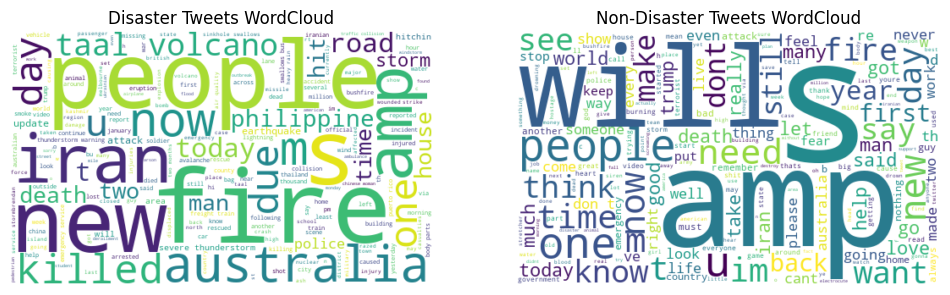


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1878
           1       0.86      0.42      0.57       396

    accuracy                           0.89      2274
   macro avg       0.87      0.70      0.75      2274
weighted avg       0.88      0.89      0.87      2274


Confusion Matrix:
 [[1850   28]
 [ 228  168]]


In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r"C:\Users\kamba\Downloads\tweets.csv\tweets.csv")

print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:\n", df['target'].value_counts())

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  
    text = re.sub(r'\@w+|\#','', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = re.sub(r'\d+', '', text)  
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

disaster_tweets = " ".join(df[df['target']==1]['clean_text'])
nondisaster_tweets = " ".join(df[df['target']==0]['clean_text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wc1 = WordCloud(width=500, height=300, background_color='white').generate(disaster_tweets)
plt.imshow(wc1, interpolation='bilinear')
plt.title("Disaster Tweets WordCloud")
plt.axis("off")

plt.subplot(1,2,2)
wc2 = WordCloud(width=500, height=300, background_color='white').generate(nondisaster_tweets)
plt.imshow(wc2, interpolation='bilinear')
plt.title("Non-Disaster Tweets WordCloud")
plt.axis("off")
plt.show()

X = df['clean_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))